In [2]:
import pandas as pd
import numpy as np

## setting pandas print option to print decimal values upto 4 decimal places
np.set_printoptions(precision = 4, linewidth=100)

import os
os.chdir("D:\\Dataset")

In [3]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#dropping unwanted columns

insurance_df = insurance[["bmi","charges"]]
insurance_df.head()

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


In [5]:
insurance_df.shape

(1338, 2)

In [6]:
#insurance_data = insurance_df[1:101]
#insurance_data.info()

In [7]:
#Creating Feature Set(X) and Outcome Variable(Y)

import statsmodels.api as sm
X = sm.add_constant(insurance_df["bmi"])
X.head()

C:\Users\sumed\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bmi
0,1.0,27.900
1,1.0,33.770
2,1.0,33.000
3,1.0,22.705
4,1.0,28.880


In [8]:
y = insurance_df["charges"]

In [9]:
#splitting the data into train and test/validation sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y,train_size = 0.8, random_state = 100)

In [10]:
#Fitting the model
insurance_lm = sm.OLS(y_train,X_train).fit()


In [11]:
print(insurance_lm.params)

const    2235.553645
bmi       352.730730
dtype: float64


In [12]:
# Model Diagnostics
# 1. Coefficient of determination (R-squared)
# 2. Hypothesis test for the regression coefficient
# 3. Analysis of variance for overall model validity (mportant for multiple regression)
# 4. Residual analysis to validate the regression model assumption
# 5. Outlier analysis

In [13]:
#The primary objective of regression is to explain the variation in Y using the knowledge of X. 
#The coefficient of determination R-squared measures the percentage of variation in Y explained by the model 
# Higher R-squared indicates better fit

In [14]:
# Hypotheis test for the regression coefficient

In [15]:
# Regression Model Summary Using python
insurance_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.37e-09
Time:                        07:58:15   Log-Likelihood:                -11550.
No. Observations:                1070   AIC:                         2.310e+04
Df Residuals:                    1068   BIC:                         2.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2235.5536   1834.255      1.219      0.223   -1363.600    5834.707
bmi          352.7307     58.578      6.022      0.000     237.790     467.671
==============================================================================
Omnibus:                      221.139   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.878
Skew:                           1.337   Prob(JB):                     6.51e-82
Kurtosis:                       4.112   Cond. No.                         159.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Concluson
#The model R-Squared value is 0.033 i.e. the model explians 3.3% of the variation in charges.
#The p-value for the t-test is 0.000  

In [17]:
# Residual Analysis

## Check for Normal Distribution of Residual

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 576x432 with 0 Axes>

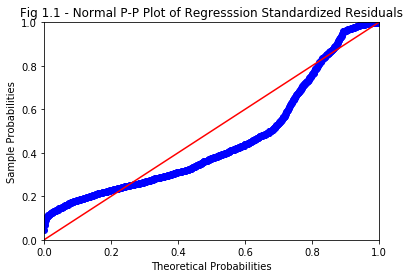

In [18]:
insurance_residue = insurance_lm.resid
probplot = sm.ProbPlot(insurance_residue)
plt.figure(figsize = (8,6))
probplot.ppplot(line = "45")
plt.title("Fig 1.1 - Normal P-P Plot of Regresssion Standardized Residuals")
plt.show()

In [19]:
# the diagonal line is the cummulative distribution of a normal distribution, whereas the blue line represents the cummulative distribution of the residuals.

In [20]:
# Test of Homoskedasticity

#The residuals have constant variance across different values of the predicted value.
# Homoskedasticity can be observed by drawing a residual plot, a plot between standardized residual value and standardized predicted value. If theree's heteroskedasticity, then a funnel tyoe shape n the residual plot can be expected.


In [21]:
# To get standardized value of a series.

def get_Standardized_values(vals):
    return (vals - vals.mean())/vals.std()

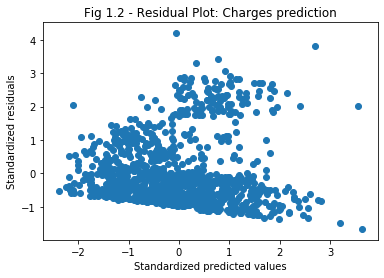

In [22]:
plt.scatter(get_Standardized_values(insurance_lm.fittedvalues),
           get_Standardized_values(insurance_residue))
plt.title("Fig 1.2 - Residual Plot: Charges prediction");
plt.xlabel("Standardized predicted values")
plt.ylabel('Standardized residuals');

In [23]:
# Residuals have no funnel shape which means they have constant variance. 

In [24]:
#Outlier Analysis

#The distance  measures useful in identifying influential observations:
#1.Z-Score
#2.Mahalanobis Distance
#3.Cook's distance
#4.Leverage Values

In [25]:
from scipy.stats import zscore

In [26]:
insurance_df["z_score_charges"] = zscore(insurance_df.charges)
insurance_df[(insurance_df.z_score_charges > 3.0)|(insurance_df.z_score_charges < -3.0)]

C:\Users\sumed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bmi,charges,z_score_charges
34,36.400,51194.55914,3.132806
543,47.410,63770.42801,4.171663
577,38.095,58571.07448,3.742159
819,35.530,55135.40209,3.458348
1146,32.800,52590.82939,3.248148
1230,34.485,60021.39897,3.861966
1300,30.360,62592.87309,4.074389


In [27]:
# There are 7 outliers present in the the dataset

In [30]:
# Making Prediction and Measuring Accuracy

#predicting using the Validation Set
y_pred = insurance_lm.predict(X_test)

In [34]:
#Finding R-squared and RMSE values

from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(y_test,y_pred))
r2_score(y_test,y_pred)

0.05445514278109265

In [38]:
#So the model explains 5.44% of the variance in the validation set.

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

12176.578924613488

In [40]:
#RMSE means the average error the model makes in predicting the outcome.The maller the value of RMSE, the better the model is.

In [46]:
#Calculation of Prediction Interval
#wls_prediction_std returns the prediction interval while making a prediction.

from statsmodels.sandbox.regression.predstd import wls_prediction_std

#Predict the y values
y_pred = insurance_lm.predict(X_test)

#Predict the high and low interval values for y
_, pred_y_low,pred_y_high = wls_prediction_std(insurance_lm, X_test, alpha = 0.1)

#Store all the values in DataFrame.
pred_y_df = pd.DataFrame({"BMI" : X_test["bmi"], "pred_y" : y_pred, "pred_y_left" : pred_y_low, "pred_y_right": pred_y_high})

In [47]:
pred_y_df[0:10]

,BMI,pred_y,pred_y_left,pred_y_right
12,34.400,14369.490746,-5073.207154,33812.188646
306,27.500,11935.648711,-7506.228841,31377.526263
318,27.645,11986.794667,-7454.865865,31428.455198
815,31.460,13332.462401,-6107.101340,32772.026141
157,25.175,11115.549765,-8331.180465,30562.279995
244,27.740,12020.304086,-7421.219711,31461.827883
642,33.915,14198.416342,-5243.479794,33640.312478
968,25.745,11316.606280,-8128.695165,30761.907725
142,25.300,11159.641106,-8286.762503,30606.044714
1034,38.380,15773.359050,-3680.165134,35226.883234
